LAP Location Analysis Hamburg

In [25]:
# import packages and load data
import pandas as pd
unis_df = pd.read_csv("../02_datasets/unis_hamburg.csv")

In [26]:
# explore data frame
display(unis_df)

,university_name_full,university_name_short,description,type,district,postal_code,lat,long,student_count
0,Universität Hamburg,UHH,generalist university,public,Rotherbaum,20146,53.56299,9.98834,42000
1,Hochschule für Angewandte Wissenschaften,HAW Hamburg,applied sciences university,public,Hamburg-Mitte,20099,53.56513,10.02246,17000
2,Technische Universität Hamburg,TUHH,technical university,public,Harburg,21073,53.45650,9.96830,7000
3,Helmut Schmidt University,HSU HH,"military, public services school",public,Hamburg-Nord,22043,53.56889,10.10960,3000
4,Hafencity Universität Hamburg,HCU Hamburg,"architecture, engineering university",public,Hamburg-Mitte,20457,53.54367,10.00615,2400
5,Medical School Hamburg,MSH,medical school,private,Hamburg-Mitte,20457,53.54122,9.98945,2000
6,Hamburg School of Business Administration,HSBA,dual business school,private,Hamburg-Mitte,20459,53.55020,9.98965,1200
7,Hochschule für bildende Künste Hamburg,HFBK,arts school,public,Uhlenhorst,22081,53.56750,10.03139,900
8,Bucerius Law School,BLS,law school,private,Hamburg-Neustadt,20355,53.55934,9.98360,600
9,Kühne Logistics University,KLU,business school,private,Hamburg-Mitte,20457,53.54021,10.00475,600


In [27]:
unis_df.columns

Index(['university_name_full', 'university_name_short', 'description', 'type',
       'district ', 'postal_code', 'lat', 'long', 'student_count'],
      dtype='object')

In [28]:
unis_df['district '].value_counts()

district 
Hamburg-Mitte       5
Rotherbaum          1
Harburg             1
Hamburg-Nord        1
Uhlenhorst          1
Hamburg-Neustadt    1
Name: count, dtype: int64

In [29]:
unis_df['postal_code'].value_counts()

postal_code
20457    3
20146    1
20099    1
21073    1
22043    1
20459    1
22081    1
20355    1
Name: count, dtype: int64

In [30]:
postal_code_totals = unis_df.groupby('postal_code')['student_count'].sum()
sorted_postal_code_totals = postal_code_totals.sort_values(ascending=False)
sorted_postal_code_totals.head(10)

postal_code
20146    42000
20099    17000
21073     7000
20457     5000
22043     3000
20459     1200
22081      900
20355      600
Name: student_count, dtype: int64

<Axes: xlabel='postal_code'>

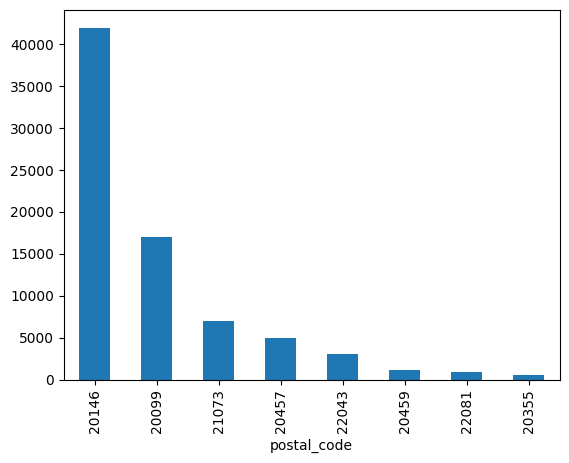

In [31]:
sorted_postal_code_totals.plot(kind='bar')

In [32]:
# import plotly for map visualizations
import plotly.express as px#
import plotly.io as pio
print("Plotly and Geopandas Import OK")

Plotly and Geopandas Import OK


In [33]:
# simple vis
df = unis_df
fig = px.scatter_map(df, lat="lat", lon="long",     color="student_count", size="student_count",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [34]:
postal_totals_df = postal_code_totals.reset_index(name="student_count")
postal_totals_df["postal_code"] = postal_totals_df["postal_code"].astype(str)

import json
with open("../02_datasets/hamburg.geojson") as f:
    geojson = json.load(f)

fig = px.choropleth_map(postal_totals_df,
                    geojson=geojson,
                    locations="postal_code",
                    color="student_count",
                    center={"lat": 53.500, "lon": 10.000},
                    zoom= 10,
                    opacity=0.6,
                    color_continuous_scale="Greens",
                    featureidkey="properties.plz_code",
                    hover_name="postal_code",
                    hover_data={"postal_code", "student_count"},
                    template="plotly_white",
                    map_style="carto-positron"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
